<a href="https://colab.research.google.com/github/tejasmanchi/NLP/blob/main/Skin_Care_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#Importing Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
df=pd.read_csv('/content/drive/MyDrive/DS/Ulta Skincare Reviews.csv')

In [20]:
df.dropna()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
...,...,...,...,...,...,...,...,...,...,...
4145,I would buy this product again,Much better product than a scrub.,Yes,7 years ago,"vernon hills, il",0,1,Daily Microfoliant,Dermalogica,3/27/23
4146,Gentle exfoliant- leaves skin smooth & soft,I've been using this exfoliant for a few month...,No,7 years ago,"Humboldt, CA",1,0,Daily Microfoliant,Dermalogica,3/27/23
4147,One of my favorite skincare products of all time.,My skin looks better now than 10 years ago.,Yes,7 years ago,"Albuquerque, NM",2,1,Daily Microfoliant,Dermalogica,3/27/23
4148,Ehhh...,This product was useless for me. I should've k...,Yes,7 years ago,Fayetteville,1,1,Daily Microfoliant,Dermalogica,3/27/23


#Preprocessing

In [21]:
df['Review_Text'] = df['Review_Text'].astype(str)
df['Review_Text'] = df['Review_Text'].apply(lambda x: x.lower())
df['Review_Text'] = df['Review_Text'].apply(lambda x: re.sub('[^a-zA-Z0-9]',' ',x))
df['Review_Text']=df['Review_Text'].apply(lambda x: word_tokenize(x))
df['Review_Text']=df['Review_Text'].apply(lambda x: ' '.join(x))
df['Review_Text']

0       love using this on my face while in the shower...
1       even better than the daily microfoliant i m ob...
2       enjoy this product so much i look forward to u...
3       i ve never tried anything like this before and...
4       this exfoliates very nicely and gives a very s...
                              ...                        
4145                     much better product than a scrub
4146    i ve been using this exfoliant for a few month...
4147           my skin looks better now than 10 years ago
4148    this product was useless for me i should ve kn...
4149    this product is amazing it is the only thing t...
Name: Review_Text, Length: 4150, dtype: object

In [12]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.9 MB/s eta 0:00:00


In [22]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['score']=df['Review_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df
# the score ranges from -1 to 1 with -1 being the most negative , 0 neutral and 1 being postive 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,score
0,Perfect,love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.7964
1,You need this,even better than the daily microfoliant i m ob...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.2960
2,Clean skin,enjoy this product so much i look forward to u...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.8214
3,Love This Stuff!,i ve never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.8636
4,This exfoliates very nicely and,this exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.6992
...,...,...,...,...,...,...,...,...,...,...,...
4145,I would buy this product again,much better product than a scrub,Yes,7 years ago,"vernon hills, il",0,1,Daily Microfoliant,Dermalogica,3/27/23,0.4404
4146,Gentle exfoliant- leaves skin smooth & soft,i ve been using this exfoliant for a few month...,No,7 years ago,"Humboldt, CA",1,0,Daily Microfoliant,Dermalogica,3/27/23,0.1624
4147,One of my favorite skincare products of all time.,my skin looks better now than 10 years ago,Yes,7 years ago,"Albuquerque, NM",2,1,Daily Microfoliant,Dermalogica,3/27/23,0.4404
4148,Ehhh...,this product was useless for me i should ve kn...,Yes,7 years ago,Fayetteville,1,1,Daily Microfoliant,Dermalogica,3/27/23,0.6712


In [23]:
df['sentiment'] = df['score'].apply(lambda x: 1 if x>0 else 0)
df

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,score,sentiment
0,Perfect,love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.7964,1
1,You need this,even better than the daily microfoliant i m ob...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.2960,1
2,Clean skin,enjoy this product so much i look forward to u...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.8214,1
3,Love This Stuff!,i ve never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.8636,1
4,This exfoliates very nicely and,this exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.6992,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4145,I would buy this product again,much better product than a scrub,Yes,7 years ago,"vernon hills, il",0,1,Daily Microfoliant,Dermalogica,3/27/23,0.4404,1
4146,Gentle exfoliant- leaves skin smooth & soft,i ve been using this exfoliant for a few month...,No,7 years ago,"Humboldt, CA",1,0,Daily Microfoliant,Dermalogica,3/27/23,0.1624,1
4147,One of my favorite skincare products of all time.,my skin looks better now than 10 years ago,Yes,7 years ago,"Albuquerque, NM",2,1,Daily Microfoliant,Dermalogica,3/27/23,0.4404,1
4148,Ehhh...,this product was useless for me i should ve kn...,Yes,7 years ago,Fayetteville,1,1,Daily Microfoliant,Dermalogica,3/27/23,0.6712,1


In [24]:
df['sentiment'].value_counts()

1    3748
0     402
Name: sentiment, dtype: int64

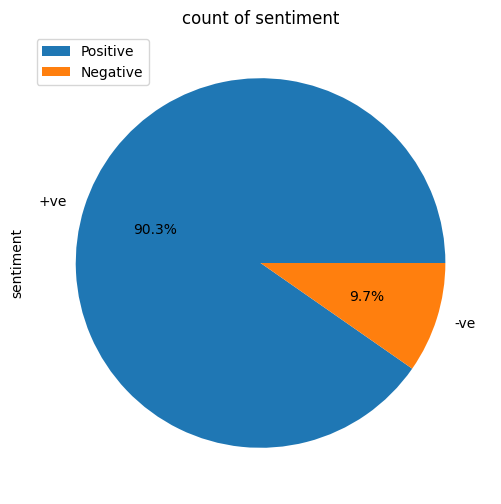

In [25]:
df['sentiment'].value_counts().plot.pie(figsize=(6,6) , title='count of sentiment' ,labels=['+ve','-ve'],autopct='%1.1f%%')
labels=["Positive","Negative"]
plt.legend(labels,loc=2)

#Bag of Words

In [26]:
cv=CountVectorizer()
x=cv.fit_transform(df['Review_Text'])

In [27]:
X=x.toarray()
y=df['sentiment']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

#SMOTE

In [29]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

In [30]:
clf=MultinomialNB()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

#Metrics

In [31]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.62      0.08      0.14       124
           1       0.91      0.99      0.95      1121

    accuracy                           0.90      1245
   macro avg       0.77      0.54      0.55      1245
weighted avg       0.88      0.90      0.87      1245



In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[  10  114]
 [   6 1115]]


[[  10  114]
 [   6 1115]]


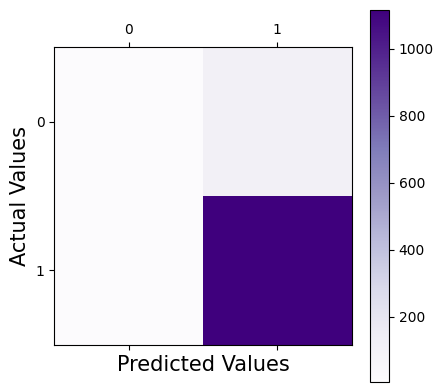

In [36]:
plt.matshow(cm,cmap=plt.cm.Purples)
plt.colorbar()
plt.ylabel('Actual Values',fontsize=15)
plt.xlabel('Predicted Values',fontsize=15)
print(cm)